In [145]:
import random
import math
import time

In [151]:
class node:
    def __init__(self):
        self.x = None
        self.y = None
class pairnode:
    def __init__(self, x1, x2):
        self.distance = None
        self.next = None
        self.read_data(x1, x2)
    def read_data(self, x1, x2):
        self.pair = [[x1.x, x1.y], [x2.x, x2.y]]
        self.distance = distance(x1, x2)
        
class autosort_list:
    def __init__(self, m):
        self.size = m
        self.length = 0
        self.head = None
        self.tail = None
    def is_empty(self):
        return self.length == 0
    def delete_tail(self):
        if self.is_empty():
            raise Exception("The list is empty, can not delete the tail!")
        i = 0
        pre_node = None
        curr_node = self.head
        while curr_node.next != None:
            pre_node = curr_node
            curr_node = curr_node.next
        pre_node.next = None
        self.tail = pre_node
        self.length -= 1
        return 
    def length(self):
        return self.length
    def __iter__(self):
       
        current = self.head
       
        while current is not None:
            yield current
        
            current = current.next
    def insert(self, pairnode):
        if self.is_empty():
            self.head = pairnode
            self.tail = pairnode
            self.length += 1

        else:
            pre_node = None
            curr_node = self.head
            while curr_node != None:
                if pairnode.pair == curr_node.pair:
                    break
                if pairnode.distance >= curr_node.distance and curr_node.next != None:
                    pre_node = curr_node
                    curr_node = curr_node.next
                elif pairnode.distance >= curr_node.distance and curr_node.next == None:
                    curr_node.next = pairnode
                    self.tail = pairnode
                    self.length += 1
                    break
                else:
                    if pre_node == None:
                        pairnode.next = self.head
                        self.head = pairnode
                        self.length += 1
                        break
                    else:
                        pairnode.next = pre_node.next
                        pre_node.next = pairnode
                        self.length += 1
                        break
            if self.length > self.size:
                self.delete_tail()
                    
                
        return
        
    def minimum(self):
        return self.head.distance
    def maximum(self):
        return self.tail.distance
        

In [152]:
#sort by x using insertion sort 
def mergesort(arr):
    if len(arr) > 1:
 
         # Finding the mid of the array
        mid = len(arr)//2
 
        # Dividing the array elements
        L = arr[:mid]
 
        # into 2 halves
        R = arr[mid:]
 
        # Sorting the first half
        mergesort(L)
 
        # Sorting the second half
        mergesort(R)
 
        i = j = k = 0
 
        # Copy data to temp arrays L[] and R[]
        while i < len(L) and j < len(R):
            if L[i].x <= R[j].x:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
 
        # Checking if any element was left
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
 
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
        return arr


In [153]:
def distance(A,B):
    dist = 0
    dist = math.sqrt(((A.x-B.x)**2)+((A.y-B.y)**2))
    return dist
def findmin(list_n):
    min_node = list_n[0]
    mindist = min_node.distance
    for item in list_n:
        if item.distance < mindist:
            min_node = item
            mindist = min_node.distance
    return min_node
def ClosestPair(PX, m_list):
    n = len(PX)
    if n == 2:
        pair_node = pairnode(PX[0], PX[1])
        m_list.insert(pair_node)
        
        return m_list.tail
    if n == 3:
        pair_node_1 = pairnode(PX[0], PX[1])
        m_list.insert(pair_node_1)
        pair_node_2 = pairnode(PX[1], PX[2])
        m_list.insert(pair_node_2)
        pair_node_3 = pairnode(PX[0], PX[2])
        m_list.insert(pair_node_3)
        
        return m_list.tail
    mid = math.ceil(n/2)
    left = ClosestPair(PX[:mid], m_list)
    right = ClosestPair(PX[mid:], m_list)
    min_node = m_list.tail
    
    d = min_node.distance
    list_gn = []
    list_pn = []
    for item in PX:
        if item.x <= PX[mid].x+d and item.x >=PX[mid].x-d:
            
            list_gn.append(item) 
    if len(list_gn)> 1:
        for i in range(len(list_gn)):
            for j in range(1,len(list_gn)-i,1):
                m_list.insert(pairnode(list_gn[i], list_gn[i+j]))
    return m_list
    

In [154]:
def M_Closest_Pair(P, m):
    PX = mergesort(P)
    m_list = autosort_list(m)
    m_list = ClosestPair(PX, m_list)
    for item in m_list:
        print(str(item.pair)+"\tdistance = "+str(item.distance))
    return m

In [197]:
x = list()
y = list()
for i in range(80):
    item = random.randint(1,100)
    x.append(item)
for i in range(80):
    item = random.randint(1,100)
    y.append(item)   
points_list = list()
for i in range(len(x)):
    pnode = node()
    pnode.x = x[i]
    pnode.y = y[i]
    points_list.append(pnode)
start_time = time.time()
M_Closest_Pair(points_list, 10)
end_time = time.time()
time_range = end_time - start_time
print(time_range)

[[44, 5], [44, 5]]	distance = 0.0
[[58, 87], [58, 86]]	distance = 1.0
[[64, 38], [65, 38]]	distance = 1.0
[[74, 16], [75, 16]]	distance = 1.0
[[96, 61], [97, 60]]	distance = 1.4142135623730951
[[39, 79], [39, 81]]	distance = 2.0
[[79, 18], [81, 18]]	distance = 2.0
[[89, 57], [89, 59]]	distance = 2.0
[[8, 100], [10, 98]]	distance = 2.8284271247461903
[[15, 87], [17, 85]]	distance = 2.8284271247461903
0.008524894714355469


In [72]:
m_list = autosort_list(10)
z = 0
PX = mergesort(points_list)
for i in range(len(PX)):
    for j in range(1,len(PX)-i,1):
        z += 1
        pair_node = pairnode(PX[i], PX[i+j])
        m_list.insert(pair_node)
print(z)
curr_node = m_list.head
while curr_node != None:
    print(curr_node.pair)
    print(curr_node.distance)
    curr_node = curr_node.next

4950
[[34, 6], [34, 6]]
0.0
[[88, 92], [88, 93]]
1.0
[[19, 55], [20, 54]]
1.4142135623730951
[[31, 27], [32, 28]]
1.4142135623730951
[[64, 83], [64, 85]]
2.0
[[4, 2], [6, 1]]
2.23606797749979
[[30, 29], [31, 27]]
2.23606797749979
[[30, 29], [32, 28]]
2.23606797749979
[[32, 24], [34, 25]]
2.23606797749979
[[44, 88], [46, 89]]
2.23606797749979


In [137]:
file_name = "./input_points_100.txt"
def create_100_random_points(filename):
    x = list()
    y = list()
    f = open(filename, "w")
    for i in range(100):
        item = random.randint(1,100)
        x.append(item)
    for i in range(100):
        item = random.randint(1,100)
        y.append(item) 
    for index in range(100):
        f.write(str(x[index])+"\t"+str(y[index]) + "\n")

    f.close()
    return 
create_100_random_points(file_name)

'Complete'

In [169]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

def isint(num):
    try:
        int(num)
        return True
    except ValueError:
        return False
    
def read_input(filename):
    points_list = list()
    
    with open(filename, "r") as f:
        line_num=1
        for line in f:
            elements = line.split()
            #print(elements)
            if len(elements) != 2:
                raise Exception("Line %i is not qualified points."% line_num)
            if isfloat(elements[0]) or isint(elements[0]):
                if isfloat(elements[1]) or isint(elements[1]):
                    xy = [eval(i) for i in elements]
                    point_node = node()
                    point_node.x = xy[0]
                    #print(point_node.x)
                    point_node.y = xy[1]
                    points_list.append(point_node)
                    
                    
                    
                else:
                    raise Exception("Line %i contains non-numeric value."% line_num)
            else:
                raise Exception("Line %i contains non-numeric value."% line_num)
            line_num += 1
    return points_list
                
            

In [173]:
p_lsit = read_input(file_name)


In [125]:
# Import the library
import argparse# Create the parser
parser = argparse.ArgumentParser()# Add an argument
parser.add_argument('--file_path', type=str, required=True)# Parse the argument
parser.add_argument('--num', type=int, required=True)
parser.add_argument('--auto', type=str, help="Auto-create 100 randomized points.")
args = parser.parse_args()
file_path = args.file_path
m = args.num

if args.auto:
    create_100_random_points(file_path)
points_list = read_input(file_path)
    


False

In [176]:
M_Closest_Pair(p_lsit, 100)

[[16, 73], [16, 73]]	distance = 0.0
[[21, 97], [21, 96]]	distance = 1.0
[[23, 9], [24, 9]]	distance = 1.0
[[22, 10], [23, 9]]	distance = 1.4142135623730951
[[72, 64], [73, 63]]	distance = 1.4142135623730951
[[22, 10], [24, 9]]	distance = 2.23606797749979
[[55, 21], [57, 22]]	distance = 2.23606797749979
[[63, 42], [64, 40]]	distance = 2.23606797749979
[[85, 87], [86, 85]]	distance = 2.23606797749979
[[29, 45], [31, 43]]	distance = 2.8284271247461903
[[50, 84], [52, 82]]	distance = 2.8284271247461903
[[56, 50], [58, 52]]	distance = 2.8284271247461903
[[89, 100], [89, 97]]	distance = 3.0
[[31, 43], [32, 40]]	distance = 3.1622776601683795
[[38, 62], [41, 61]]	distance = 3.1622776601683795
[[32, 40], [35, 39]]	distance = 3.1622776601683795
[[38, 62], [40, 65]]	distance = 3.605551275463989
[[42, 81], [45, 79]]	distance = 3.605551275463989
[[72, 11], [74, 8]]	distance = 3.605551275463989
[[90, 53], [93, 51]]	distance = 3.605551275463989
[[14, 11], [14, 15]]	distance = 4.0
[[9, 24], [9, 20]]	d

100

In [171]:
for i in range(len(p_lsit)):
    print (p_lsit[i].x)
    

32
86
9
57
20
60
31
24
30
64
58
32
74
59
4
85
92
56
63
45
41
23
38
90
98
1
100
72
96
66
98
9
52
78
41
9
31
33
14
19
16
89
64
89
49
51
67
99
77
40
73
20
21
78
15
27
3
7
58
93
89
14
16
85
15
77
69
29
36
50
29
31
21
88
1
72
40
87
30
78
42
89
55
22
97
35
73
89
79
18
73
22
33
18
20
76
42
64
38
66


In [283]:
n_list = [10, 20, 40, 80, 100, 200, 400, 600, 800, 1000, 2000, 4000, 8000, 10000]
time_list_2=[]
for num in n_list:
    x = list()
    y = list()
    for i in range(num):
        item = random.randint(1,num*10)
        x.append(item)
    for i in range(num):
        item = random.randint(1,num*10)
        y.append(item)   
    points_list = list()
    for i in range(len(x)):
        pnode = node()
        pnode.x = x[i]
        pnode.y = y[i]
        points_list.append(pnode)
    start_time = time.time()
    M_Closest_Pair(points_list, 10)
    end_time = time.time()
    time_range = end_time - start_time
    time_list_2.append(time_range)
    print(time_range)

[[71, 78], [75, 70]]	distance = 8.94427190999916
[[51, 58], [55, 66]]	distance = 8.94427190999916
[[55, 66], [71, 78]]	distance = 20.0
[[55, 66], [75, 70]]	distance = 20.396078054371138
[[75, 70], [98, 72]]	distance = 23.08679276123039
[[28, 23], [39, 1]]	distance = 24.596747752497688
[[51, 58], [75, 70]]	distance = 26.832815729997478
[[71, 78], [98, 72]]	distance = 27.65863337187866
[[51, 58], [71, 78]]	distance = 28.284271247461902
[[1, 4], [28, 23]]	distance = 33.015148038438355
0.0013821125030517578
[[52, 16], [60, 1]]	distance = 17.0
[[29, 151], [33, 168]]	distance = 17.46424919657298
[[88, 4], [95, 22]]	distance = 19.313207915827967
[[46, 194], [62, 177]]	distance = 23.345235059857504
[[60, 1], [88, 4]]	distance = 28.160255680657446
[[115, 149], [143, 156]]	distance = 28.861739379323623
[[33, 168], [46, 194]]	distance = 29.068883707497267
[[52, 16], [65, 42]]	distance = 29.068883707497267
[[33, 168], [62, 177]]	distance = 30.364452901377952
[[100, 66], [121, 43]]	distance = 31.14

In [284]:
print(time_list_2)

[0.0013821125030517578, 0.002267122268676758, 0.004014730453491211, 0.006464958190917969, 0.007815122604370117, 0.015870094299316406, 0.03215312957763672, 0.047653913497924805, 0.06651806831359863, 0.05933403968811035, 0.17435407638549805, 0.2926630973815918, 0.7232568264007568, 0.8175489902496338]


In [220]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline


In [205]:
x1 = np.array(n_list)
y1 = np.array(time_list)

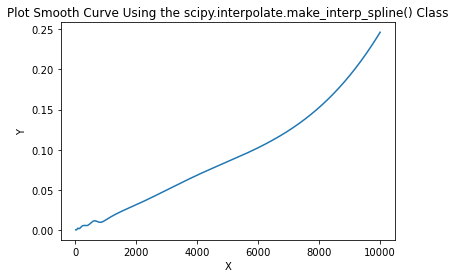

In [224]:
X1_Y1_Spline = make_interp_spline(x1, y1)
X_1 = np.linspace(x1.min(), x1.max(), 500)
Y_1 = X1_Y1_Spline(X_1)
plt.plot(X_1, Y_1)


In [286]:
x2 = np.array(n_list)
y2 = x2*np.log2(x2)/100000
y2

array([3.32192809e-04, 8.64385619e-04, 2.12877124e-03, 5.05754248e-03,
       6.64385619e-03, 1.52877124e-02, 3.45754248e-02, 5.53729121e-02,
       7.71508495e-02, 9.96578428e-02, 2.19315686e-01, 4.78631371e-01,
       1.03726274e+00, 1.32877124e+00])

In [287]:
X2_Y2_Spline = make_interp_spline(x2, y2)
X_2 = np.linspace(x2.min(), x2.max(), 500)
Y_2 = X2_Y2_Spline(X_2)

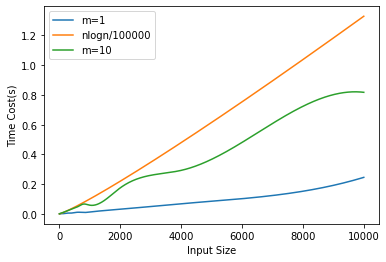

In [291]:
X1_Y1_Spline = make_interp_spline(x1, y1)
X_1 = np.linspace(x1.min(), x1.max(), 500)
Y_1 = X1_Y1_Spline(X_1)
x3 = x2
y3 = np.array(time_list_2)
X3_Y3_Spline = make_interp_spline(x3, y3)
X_3 = np.linspace(x3.min(), x3.max(), 500)
Y_3 = X3_Y3_Spline(X_3)
plt.plot(X_1, Y_1, label = "m=1")
plt.plot(X_2, Y_2, label = "nlogn/100000")
plt.plot(X_3, Y_3, label="m=10")
plt.legend()
plt.xlabel("Input Size")
plt.ylabel("Time Cost(s)")
plt.show()

[0.00050879 0.0003772  0.00105241 0.00232102 0.00247245 0.00197213
 0.00206994 0.00262485 0.00343248 0.00428845 0.00499382 0.00546951
 0.00575334 0.00588801 0.0059162  0.0058806  0.00582391 0.00578881
 0.00581798 0.00595412 0.00623811 0.0066726  0.00722399 0.00785719
 0.00853716 0.00922881 0.00989708 0.01050692 0.01102325 0.01141101
 0.01163675 0.01169933 0.01162759 0.01145145 0.01120086 0.01090577
 0.01059613 0.01030186 0.01005292 0.00987926 0.00980969 0.00985163
 0.00999313 0.01022158 0.01052436 0.01088884 0.0113024  0.01175242
 0.01222628 0.01271136 0.01319538 0.0136726  0.01414299 0.01460671
 0.01506395 0.01551487 0.01595963 0.0163984  0.01683137 0.01725869
 0.01768053 0.01809706 0.01850846 0.01891489 0.01931651 0.01971351
 0.02010605 0.0204943  0.02087842 0.02125859 0.02163498 0.02200775
 0.02237707 0.02274312 0.02310606 0.02346606 0.0238233  0.02417793
 0.02453014 0.02488008 0.02522793 0.02557386 0.02591803 0.02626062
 0.0266018  0.02694172 0.02728058 0.02761852 0.02795572 0.0282